In [1]:
import tensorflow as tf

import zipfile
import os

# Ekstrak file .zip
zip_path = '/content/model_and_history (1).zip'  # Ubah sesuai dengan nama file Anda
extract_path = 'extracted_model'    # Folder tujuan ekstraksi

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Model extracted to {extract_path}")


Model extracted to extracted_model


In [2]:
import tensorflow as tf

# Path ke model yang diekstrak
model_path = os.path.join(extract_path, '/content/extracted_model/best_model.keras')

# Load model
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully.")


Model loaded successfully.


Saving oval989.webp to oval989 (1).webp


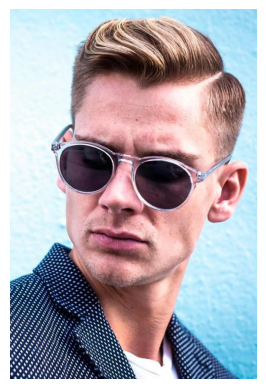

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediksi: square
Confidence: 35.92%


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Load model yang sudah dilatih
model = tf.keras.models.load_model('/content/extracted_model/best_model.keras')  # Ganti dengan path model Anda

# Mendefinisikan class_indices secara manual
class_indices = {'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}
class_names = {v: k for k, v in class_indices.items()}

# Fungsi untuk mempersiapkan gambar sebelum prediksi
def prepare_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

# Fungsi untuk memprediksi gambar
def predict_image(image_path):
    img_array = prepare_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_name = class_names[predicted_class[0]]
    confidence = np.max(predictions) * 100
    return class_name, confidence


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
# Upload gambar
uploaded = files.upload()

# Ambil nama file yang diupload
image_path = next(iter(uploaded))

# Tampilkan gambar yang diupload
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.show()

# Prediksi gambar
predicted_class, confidence = predict_image(image_path)

# Menampilkan hasil prediksi
print(f"Prediksi: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

In [ ]:
import pickle

# Ganti 'path/to/history.pkl' dengan path file Anda jika di luar directory kerja saat ini
with open('/content/extracted_model/history.pkl', 'rb') as f:
    history = pickle.load(f)

print("History berhasil dimuat.")
